In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import dataset from file directory
WV2015F = pd.read_excel("WV2015F.xlsx")

In [3]:
WV2015F.shape

(5132, 185)

In [4]:
WV2015F.head()

,Num,Country,Imp-Family,Imp-Friends,Imp-Leisure,Imp-Politics,Imp-Work,Imp-Religion,Happy,Healthy,...,Vote-national,Employed,Savings,SocialClass,Income,Sex,BirthYear,Age,Educ,LiveWithParents
0,5019,356,1.0,2.0,3.0,1.0,3.0,1.0,1.0,1.0,...,2.0,2.0,1.0,2.0,4.0,2,1982,32,6.0,2.0
1,5142,356,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,1.0,5.0,3.0,4.0,7.0,2,1965,49,4.0,1.0
2,3930,356,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2.0,8.0,1.0,3.0,2.0,1,1954,60,6.0,1.0
3,3943,356,1.0,2.0,1.0,3.0,1.0,2.0,2.0,3.0,...,1.0,7.0,2.0,2.0,10.0,1,1988,26,4.0,1.0
4,3950,356,1.0,2.0,1.0,3.0,1.0,2.0,2.0,3.0,...,1.0,7.0,2.0,2.0,10.0,1,1985,29,4.0,2.0


In [5]:
# Create another object holding the data and print the names of the file's variables (columns)
dataf1 = WV2015F[:]
dataf1.iloc[160:163,:]

,Num,Country,Imp-Family,Imp-Friends,Imp-Leisure,Imp-Politics,Imp-Work,Imp-Religion,Happy,Healthy,...,Vote-national,Employed,Savings,SocialClass,Income,Sex,BirthYear,Age,Educ,LiveWithParents
160,5129,356,1.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,...,1.0,1.0,1.0,4.0,6.0,1,1950,64,3.0,2.0
161,5132,356,NaN,2.0,3.0,3.0,2.0,2.0,2.0,3.0,...,1.0,4.0,1.0,3.0,1.0,1,1982,32,1.0,2.0
162,5133,356,1.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,...,1.0,1.0,1.0,4.0,6.0,1,1989,25,3.0,2.0


In [6]:
dataf1.shape

(5132, 185)

In [7]:
dataf1.columns

Index(['Num', 'Country', 'Imp-Family', 'Imp-Friends', 'Imp-Leisure',
       'Imp-Politics', 'Imp-Work', 'Imp-Religion', 'Happy', 'Healthy',
       ...
       'Vote-national', 'Employed', 'Savings', 'SocialClass', 'Income', 'Sex',
       'BirthYear', 'Age', 'Educ', 'LiveWithParents'],
      dtype='object', length=185)

In [11]:
# Check for null values
dataf1.isnull().sum().sum()
# np.isnan(dataf1).sum().sum()

6818

In [12]:
# Handling missing data
# we can keep only complete records...
dataf2 = dataf1.dropna(how='any')  #drops any row with a NaN; with axis=1, drops columns; how "any" or "all"
dataf2.iloc[356:359,:]

,Num,Country,Imp-Family,Imp-Friends,Imp-Leisure,Imp-Politics,Imp-Work,Imp-Religion,Happy,Healthy,...,Vote-national,Employed,Savings,SocialClass,Income,Sex,BirthYear,Age,Educ,LiveWithParents
672,4892,356,4.0,2.0,4.0,4.0,1.0,4.0,4.0,4.0,...,2.0,7.0,4.0,1.0,9.0,2,1973,41,5.0,2.0
691,5244,356,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,7.0,3.0,2.0,2.0,2,1995,19,7.0,1.0
692,5246,356,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,2.0,7.0,3.0,2.0,2.0,1,1991,23,7.0,1.0


In [13]:
dataf2.shape

(2497, 185)

In [14]:
dataf1.median().head()

Num            4798.5
Country         356.0
Imp-Family        1.0
Imp-Friends       2.0
Imp-Leisure       2.0
dtype: float64

In [15]:
# or we can replace missing values (mean, median, )
# dataf3 = dataf1.fillna(dataf1.median())
dataf3 = dataf1.copy(deep = True)
dataf3.fillna(dataf3.median(), inplace=True)

dataf3.iloc[160:163,:]


,Num,Country,Imp-Family,Imp-Friends,Imp-Leisure,Imp-Politics,Imp-Work,Imp-Religion,Happy,Healthy,...,Vote-national,Employed,Savings,SocialClass,Income,Sex,BirthYear,Age,Educ,LiveWithParents
160,5129,356,1.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,...,1.0,1.0,1.0,4.0,6.0,1,1950,64,3.0,2.0
161,5132,356,1.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,...,1.0,4.0,1.0,3.0,1.0,1,1982,32,1.0,2.0
162,5133,356,1.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,...,1.0,1.0,1.0,4.0,6.0,1,1989,25,3.0,2.0


In [16]:
dataf3.shape

(5132, 185)

In [18]:
#Create dataset including the variables for the analysis

dataf4 = dataf3.iloc[:, np.r_[2:20,22:32,45,60:68,136:168,178,180,182]]
y=dataf1.iloc[:,21]
#y=dataf3.iloc[:,21]


In [19]:
print(len(y))
print(y.name)
print(dataf4.shape)
print(dataf4.columns)


5132
Life Sat
(5132, 72)
Index(['Imp-Family', 'Imp-Friends', 'Imp-Leisure', 'Imp-Politics', 'Imp-Work',
       'Imp-Religion', 'Happy', 'Healthy', 'Child-Independent',
       'Child-HardWork', 'Child-Responsible', 'Child-Imagination',
       'Child-Respect', 'Child-Thrift', 'Child-Persevere', 'Child-Religious',
       'Child-Unselfish', 'Child-Obey', 'Trust Others24', 'Active-Church',
       'Active-Sports', 'Active-Arts', 'Active-Union', 'Active-Politics',
       'Active-Environment', 'Active-Profession', 'Active-Charity',
       'Active-Consumer Org', 'LOC', 'SchCreate', 'SchRich', 'SchSecure',
       'SchFun', 'SchSuccess', 'SchExciting', 'SchBehave', 'SchEnviron',
       'Locale-Secure', 'Locale-Robberies', 'Locale-Alcohol', 'Locale-NoCash',
       'Locale-NoNightOut', 'Locale-Gun', 'Locale-CrimeVictimSelf',
       'Locale-CrimeVictimFamily', 'Worry-LoseJob', 'Worry-ChildEduc',
       'Worry-War', 'War4Justice', 'Worry-NoFood', 'Worry-Crime',
       'Worry-MedicalCare', 'Worry-Mone

In [26]:
# y is a Series into a numeric value and replace NA by median
y.describe()

y.value_counts() 

y1 = y.fillna(y.median())
y1.isnull().sum()

y1.describe()

y1.value_counts()


8.0     1209
7.0      836
9.0      604
6.0      492
5.0      448
10.0     349
2.0      322
1.0      322
3.0      277
4.0      273
Name: Life Sat, dtype: int64

In [27]:
#Another way to split data
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(dataf4, y1, test_size=0.33, random_state=42)

In [29]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        dataf1[feature],
        dataf1[target],
        c='black'
    )
    plt.xlabel("IV: {} ".format(feature))
    plt.ylabel("DV: Satisfaction")
    plt.show()

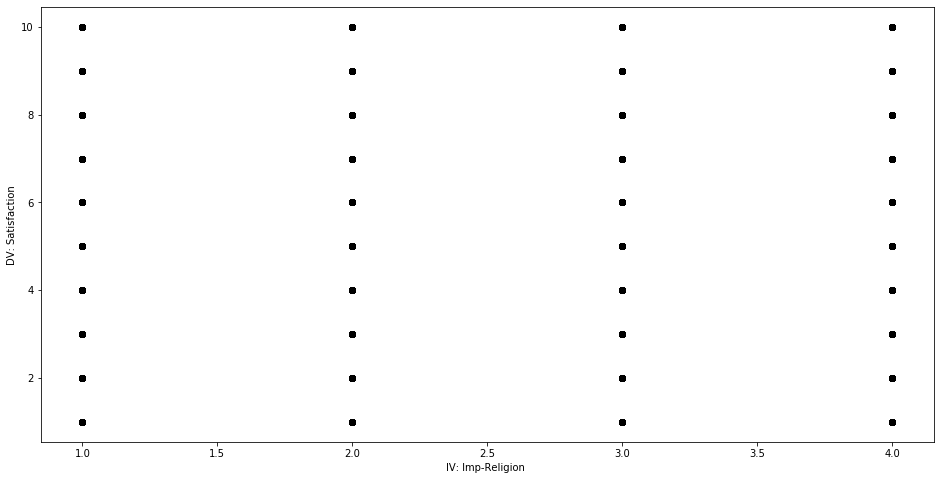

In [31]:
scatter_plot('Imp-Religion','Life Sat')

In [33]:
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score


In [40]:
# Ridge
# Optimizes  RSS (Residual Sum of Squares) + α * (sum of square of coefficients)
# Where α (alpha) defines the balance between both.


r_reg = linear_model.Ridge(alpha=100)
r_reg.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
r_reg.coef_

array([ 0.03006505,  0.04563641, -0.06826676,  0.11800255, -0.031127  ,
        0.04598377, -0.54669401, -0.19720593, -0.01527095, -0.1120521 ,
       -0.06306759,  0.07170682,  0.09472984, -0.06532299,  0.0829484 ,
        0.24056522, -0.02677758, -0.11971658, -0.30806925,  0.12928112,
       -0.05531862,  0.08751663,  0.00871157,  0.05084495, -0.02980662,
       -0.08026641,  0.06071283, -0.15260608,  0.35409001, -0.04909781,
        0.08626599, -0.00334526, -0.00665588,  0.00748683,  0.02798611,
       -0.01313796, -0.00507975, -0.21406054,  0.01710113, -0.02018839,
       -0.03374867, -0.05087924,  0.01966579,  0.08331957,  0.00446241,
       -0.00653948,  0.13754163,  0.06387891,  0.17156494,  0.16583922,
        0.14900266, -0.04506482,  0.14121129,  0.08792871, -0.02199236,
        0.04465505,  0.03348852, -0.00620234,  0.02971747,  0.0193245 ,
       -0.02038783, -0.01859046,  0.10793701, -0.08545161,  0.06477583,
       -0.11672795, -0.02053942,  0.02516293,  0.04967764, -0.09

In [37]:
r_reg.intercept_

2.3798640767046466

In [38]:
# Optimizes  RSS (Residual Sum of Squares) + α * (sum of square of coefficients)
# Where α (alpha) defines the balance between both (Lambda in R...)
# How to find α: use cross validation

#alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
#alpha = np.logspace(-6, 6, 13)
alpha = [1e-2, 1, 5, 10, 20, 100, 1000, 10000, 100000, 1e10, 1e12]

r_reg = linear_model.RidgeCV(alphas=alpha)
r_reg.fit(X_train, y_train)


RidgeCV(alphas=array([1.e-02, 1.e+00, 5.e+00, 1.e+01, 2.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+10, 1.e+12]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [39]:
r_reg.alpha_

100.0

In [41]:
# Lasso


In [42]:
l_reg = linear_model.Lasso(alpha=0.1)
l_reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
l_reg.predict(X_test)

array([7.32335788, 6.45386646, 8.06853229, ..., 6.62285838, 4.73952568,
       6.58778005])

In [44]:
# Elastic Net

en_reg = linear_model.ElasticNet(alpha=0.1)
en_reg.fit = (X_train, y_train)

In [45]:
# Ridge results


In [46]:
X_train.shape

(3438, 72)

In [47]:
r_reg.coef_.shape

(72,)

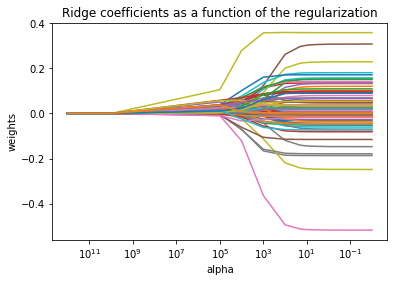

In [48]:

coefs = []
for a in alpha:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Display results

ax = plt.gca()

ax.plot(alpha, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [49]:
import sklearn.metrics

In [50]:
sklearn.metrics.max_error(y_test, r_reg.predict(X_test))

8.329041333396894

In [51]:
sklearn.metrics.mean_squared_error(y_test, r_reg.predict(X_test))

3.6342384277956783

In [52]:
sklearn.metrics.median_absolute_error(y_test, r_reg.predict(X_test))

1.1751618628308318